In [1]:
# getting train and test data
import pandas as pd
train_data = pd.read_csv('./cookie_train.csv')
test_data = pd.read_csv('./cookie_test.csv')

train_data.head()

,Id,Texture Hardness,Texture Chewiness,Texture Crispiness,Color L*,Color a*,Color b*,Taste Sweetness,Taste Saltiness,Taste Bitterness,Shape Diameter,Shape Thickness,Smell Intensity,Smell Complexity,Smell Specific Compound,Detected Chemical,Defective
0,59,120,0.05,1.2,80,20,40,2.0,0.5,0.10,6.0,0.5,1.0,10,5,Ethyl butyrate,0
1,60,150,0.08,1.4,85,23,43,3.0,0.6,0.20,5.5,0.6,0.9,12,6,Limonene,1
2,61,135,0.06,1.3,82,22,42,2.5,0.3,0.30,6.2,0.4,0.8,8,4,?-Pinene,0
3,62,100,0.02,1.0,75,18,38,1.5,0.2,0.05,7.0,0.7,0.7,7,3,Linalool,1
4,63,145,0.07,1.5,87,25,45,3.5,0.8,0.15,5.8,0.5,0.9,13,7,?-Caryophyllene,1


## Abstracting Features


We will try to find what features we would want to use in our model to be investigated. To be simple, let's test the `Texture Hardness` and `Taste Saltiness` features.


In [3]:
# Creating a new dataframe for variable we want to pass into a Decision Tree
# Note: keeping Id and Category columns since Kaggle has it in the submission format

features_interested = ['Texture Hardness', 'Taste Saltiness']
features_interested_df = train_data[['Id'] + features_interested + ['Defective']]

features_interested_df.head()



,Id,Texture Hardness,Taste Saltiness,Defective
0,59,120,0.5,0
1,60,150,0.6,1
2,61,135,0.3,0
3,62,100,0.2,1
4,63,145,0.8,1


## Graph things for visualization


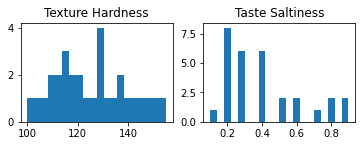

In [4]:
# plotting distribution of the features we just created
import matplotlib.pyplot as plt

for i,  feature in enumerate(features_interested):
    plt.subplot(2, len(features_interested), i + 1)
    plt.hist(features_interested_df[feature], bins=20)
    plt.title(feature)
    

## Training the model
We will use the Decision Tree to fit our desired features

In [6]:
from sklearn.tree import DecisionTreeClassifier

# creating a classifier model
clf = DecisionTreeClassifier()

# training the classifier
clf = clf.fit(features_interested_df[features_interested], features_interested_df['Defective'])

# predicting the test data ONLY ON THE FEATURES FITTED ON!
test_data['Defective'] = clf.predict(test_data[features_interested])

# creating a submission file but changing ID and Defective column names to match
# Kaggle's submission format
submission_df = test_data[['Id', 'Defective']]

# adjusting the column names to satisfy Kaggle submission format
submission_df.columns = ['Id', 'Category']

# saving the submission file
submission_df.to_csv('submission.csv', index=False)

## Testing our model
We would now have to predict the `Defective` value for each cookie. What we can do here is predict it on the training set. This will give us a sense of how accurate out model is, since we are actually given whether a cookie is `Defective` or not in the training set.


In [7]:
submission_df.head(10)

,Id,Category
0,22,0
1,23,0
2,24,1
3,25,1
4,26,1
5,27,0
6,28,1
7,29,1
8,30,1
9,31,0


In [10]:
# And now, let us see what the accuracy is using the same accuracy
# metric on the Kaggle competition made for this lab: Classification Accuracy

predicted_train_data = clf.predict(features_interested_df[features_interested])

# Now we calculate the accuracy of the model
from sklearn.metrics import accuracy_score

score = 100*accuracy_score(train_data['Defective'], predicted_train_data)

print("Accuracy of the model is " + str(score) + "%")

Accuracy of the model is 96.66666666666667%


There are other ways to look at accuracy inclusing a confusion matrix:

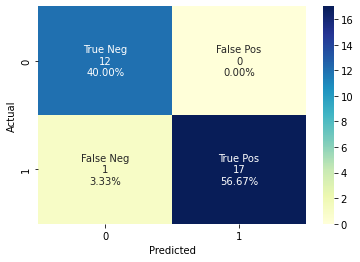

In [23]:
# Creating a confusion matrix where the number is shaded darker the more it is predicted
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cf_matrix = confusion_matrix(train_data['Defective'], predicted_train_data)

group_names = ['True Neg','False Pos',
               'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# plotting with color
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="YlGnBu")

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.show()